In [2]:
import json
import matplotlib.pyplot as plt
import os

In [19]:
path = "AH_200.json"

#with open("../output/20-20-50-240-600-1600037332558.json") as file:
#    data = json.load(file)

In [20]:
def handleFile(path):
    with open(path) as file:
        data = json.load(file)
    return data
    
def handleDir(path):
    data = []
    for jsonfile in filter(lambda x: x[-5:] == ".json", os.listdir(path)):
        with open(path+"/"+jsonfile) as file:
            data += json.load(file)
    return data

if os.path.isdir(path):
    data = handleDir(path)
elif os.path.isfile(path):
    data = handleFile(path)
else:
    print(f"Not a file or dir: {path}")

In [21]:
x = []
y = []
lim = len(data)
datalim = data[:lim]
for i in range(lim):
    for j in range(len(data[i])):
        tmp = data[i][j]
        x.append(j)
        #y.append(abs(tmp['RealHistogramMean'] - tmp['Result'])/(tmp['Max'] - tmp['Min']))
        y.append(abs(1 - tmp['Result']/tmp['Actual']))

        
#def CGd(x): return abs(x['RealHistogramMean'] - x['Result'])/(x['Max'] - x['Min'])
#def NHd(x): return abs(1 - x['Result']/x['Actual'])

Text(0.5, 1.0, '')

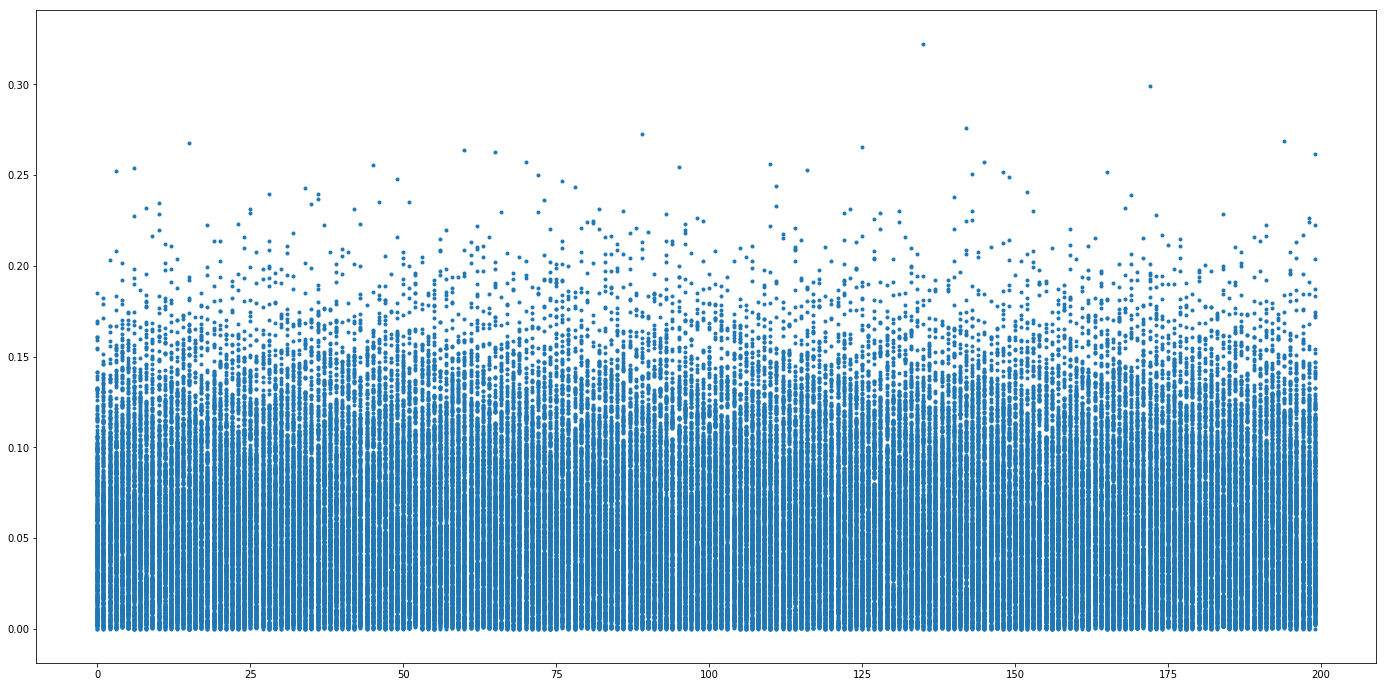

In [22]:
plt.figure(figsize=(24,12))
plt.scatter(x, y, marker='.')
#plt.yscale('log')
plt.title("")
#plt.ylim(10E-6,10E3)

In [23]:
def stepAvg(step, label):
    try: 
        return sum([series[step][label] for series in data])/len(data)
    except KeyError: 
        return None
def seriesAvg(label): return [stepAvg(i, label) for i, _ in enumerate(data[0])]

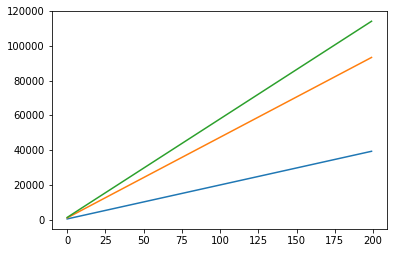

In [29]:
plt.plot(seriesAvg('EnergyMin'))
plt.plot(seriesAvg('EnergyMean'))
plt.plot(seriesAvg('EnergyMax'))
#plt.yscale("log");

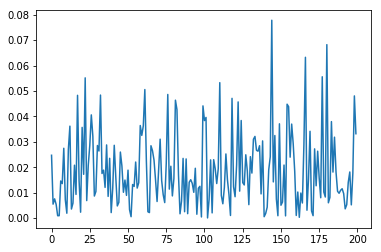

In [25]:
def CGd(x): return abs(x['RealHistogramMean'] - x['Result'])/(x['Max'] - x['Min'])
def NHd(x): return abs(1 - x['Result']/x['Actual'])
#list(map(CGd, data[0]))
plt.plot(list(map(CGd, data[0])))

In [26]:
def stepAvgFun(step, fun):
    try: 
        return sum([fun(series[step]) for series in data])/len(data)
    except KeyError: 
        return None
def seriesAvgFun(fun): return [stepAvgFun(i, fun) for i, _ in enumerate(data[0])]

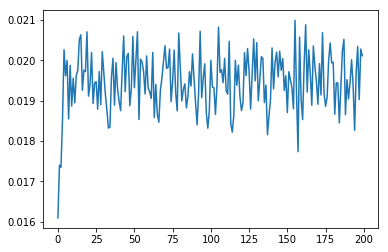

In [27]:
plt.plot(seriesAvgFun(CGd))
#plt.yscale('log')


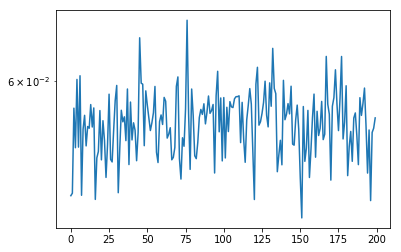

In [28]:
plt.plot(seriesAvgFun(NHd));
plt.yscale('log')


In [51]:
data[0][0]

{'EnergyMean': 908.0725,
 'Min': 0.0008099813572655101,
 'RealHistogramMean': 9.9925,
 'EnergyMin': 390.0,
 'Max': 0.995962544547637,
 'BinsChangedAvg': 2.0,
 'Result': 0.5146227748258776,
 'Actual': 0.5234664463984217,
 'EnergyMax': 1148.0}